In [1]:
#import packages

#!pip install netcdf4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#read data in
brazil = pd.read_csv('Field_measurements_Lago_Curuai.csv', delimiter = ',', header = 29)
display(brazil)

#clean data
brazil_clean1 = brazil.loc[brazil['Chlorophyll_a']>-9999.0]
brazil_clean2 = brazil.loc[brazil['Date']>20040600]
display(brazil_clean2)

#index data
lon = brazil_clean2['Longitude']
lat = brazil_clean2['Latitude']
temp = brazil_clean2['Temperature']
chl = brazil_clean2['Chlorophyll_a']


,Date,Time,Longitude,Latitude,TSS,ISS,OSS,Chlorophyll_a,DIC,DOC,Transparency,Turbidity,Temperature,pH,Conductivity,CO2
0,20030925,10:25,-55.789501,-2.20678,35.3430,28.25000,7.09300,24.4064,17.450,18.820,0.30,123,32.5,6.45,21,607.95
1,20030925,12:07,-55.852402,-2.19675,94.6200,59.34700,35.27300,205.7970,4.764,9.242,0.12,205,34.7,8.37,25,3.29
2,20030925,12:30,-55.823399,-2.17569,49.8880,40.14000,9.74800,47.7484,11.370,8.796,0.20,161,34.5,8.27,33,9.89
3,20030925,12:50,-55.836800,-2.16275,55.7920,41.19600,14.59600,54.1705,10.350,7.447,0.20,210,35.4,8.39,33,6.77
4,20030925,13:40,-55.780701,-2.14625,48.0100,32.81800,15.19200,79.5686,7.092,7.863,0.20,177,35.3,8.80,34,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,20040619,13:25,-55.220901,-2.17781,12.4263,6.95750,5.46875,19.5880,14.120,6.348,0.65,28,29.4,7.48,34,75.62
291,20040619,13:55,-55.155899,-2.19958,12.9225,8.09625,4.82625,11.3590,15.100,4.787,0.65,27,29.4,7.55,35,69.45
292,20040619,14:10,-55.155800,-2.22706,11.7656,7.02000,4.74556,12.9470,14.730,6.393,0.60,27,29.3,6.50,35,486.68
293,20040619,14:30,-55.198700,-2.23428,15.7943,5.33714,10.45710,57.0170,11.920,11.730,0.65,27,29.7,8.42,30,7.66


,Date,Time,Longitude,Latitude,TSS,ISS,OSS,Chlorophyll_a,DIC,DOC,Transparency,Turbidity,Temperature,pH,Conductivity,CO2
219,20040603,10:28,-55.311401,-2.22983,14.6429,8.82857,5.81429,19.667,14.67,8.817,0.45,34,29.5,7.51,36,73.51
220,20040603,10:51,-55.339199,-2.26236,14.0437,7.74875,6.29500,27.785,12.63,7.841,0.60,27,29.5,7.68,30,43.69
221,20040603,11:25,-55.402100,-2.27208,12.8429,5.96857,6.87429,25.655,12.12,6.279,0.60,22,29.6,7.17,28,124.29
222,20040603,11:57,-55.474201,-2.21817,16.6300,7.62857,9.00143,38.248,14.17,5.830,0.50,28,29.8,7.20,33,136.27
223,20040603,12:25,-55.548901,-2.25133,7.3290,3.47400,3.85500,15.148,10.48,7.522,0.90,15,30.0,6.74,23,239.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,20040619,13:25,-55.220901,-2.17781,12.4263,6.95750,5.46875,19.588,14.12,6.348,0.65,28,29.4,7.48,34,75.62
291,20040619,13:55,-55.155899,-2.19958,12.9225,8.09625,4.82625,11.359,15.10,4.787,0.65,27,29.4,7.55,35,69.45
292,20040619,14:10,-55.155800,-2.22706,11.7656,7.02000,4.74556,12.947,14.73,6.393,0.60,27,29.3,6.50,35,486.68
293,20040619,14:30,-55.198700,-2.23428,15.7943,5.33714,10.45710,57.017,11.92,11.730,0.65,27,29.7,8.42,30,7.66


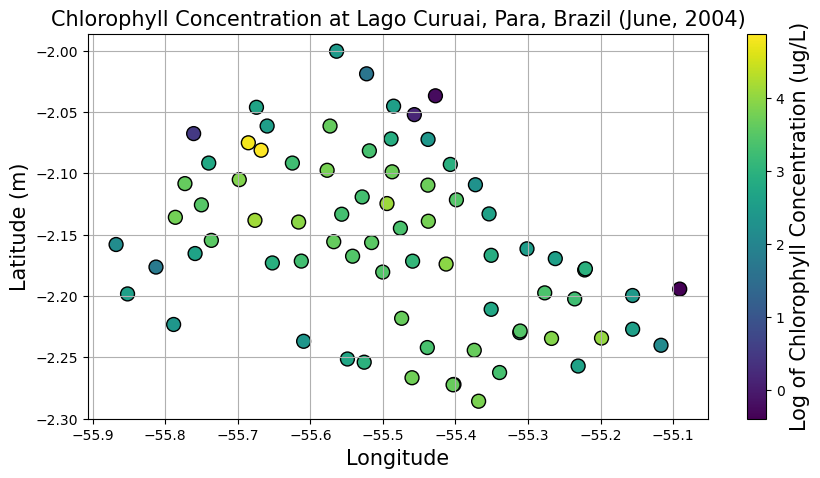

In [3]:
# make plot
fig = plt.figure(figsize = (10,5))

ax = plt.gca()
fig2 = plt.scatter(lon, lat, s= 100, c= np.log(chl),  marker= 'o', ls='-', lw= 1, edgecolor= 'black')
c = plt.colorbar(fig2, ax=ax)
c.set_label('Log of Chlorophyll Concentration (ug/L)', fontsize= 15)
plt.xlabel('Longitude', fontsize= 15)
plt.ylabel('Latitude (m)', fontsize= 15)
plt.title('Chlorophyll Concentration at Lago Curuai, Para, Brazil (June, 2004)', fontsize = 15)
plt.grid()
#save graph
#plt.savefig('Brazil_chl.png')

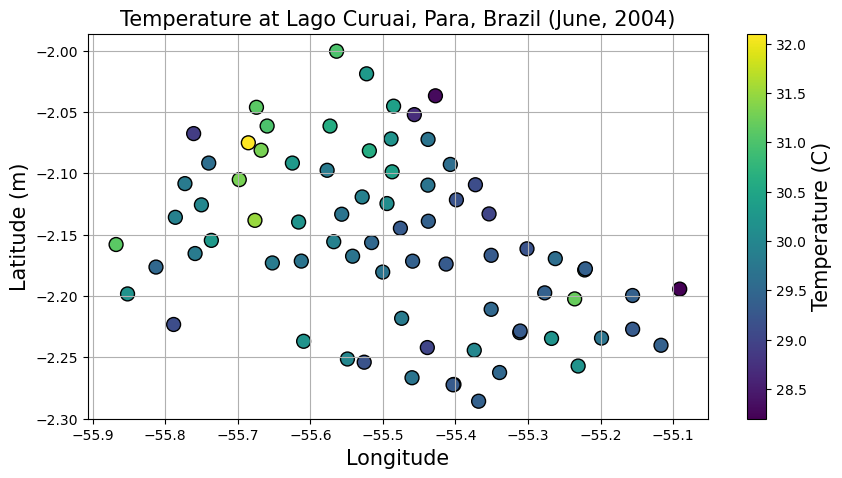

In [4]:
# make plot
fig = plt.figure(figsize = (10,5))

ax = plt.gca()
fig2 = plt.scatter(lon, lat, s=100, c= temp, marker= 'o', ls='-', lw= 1, edgecolor= 'black')

c = plt.colorbar(fig2, ax=ax)
c.set_label('Temperature (C)', fontsize= 15)
plt.xlabel('Longitude', fontsize= 15)
plt.ylabel('Latitude (m)', fontsize= 15)
plt.title('Temperature at Lago Curuai, Para, Brazil (June, 2004)', fontsize = 15)
plt.grid()

#save graph
#plt.savefig('Brazil_temp.png')